In [512]:
import pandas as pd # READ AND WRITE ON DATA
import numpy as np # COMES HANDY
import os 
import matplotlib.pyplot as plt # PLOTTING
import seaborn as sns # PLOTTING
from collections import Counter # to use Counter data structure
from PIL import Image #TO CREATE IMAGE OUT OF bYTESio
import requests # TO FETCH IMAGE FROM url
from io import BytesIO # TO CONVERT FETCHED IMAGE TO BYTES
from nltk.corpus import stopwords # STOPWORD REMOVAL
from nltk.tokenize import word_tokenize # FOR TOKENIZATION
import nltk #
from matplotlib import gridspec # used to divide screen into two different part for an image
from sklearn.metrics import pairwise_distances # FOR DISTANCE B/W TWO VECTORS
import re

# 1) Data Overview

In [157]:
data = pd.read_json('./Applied AI/tops_fashion.json')


In [158]:
data.columns.values

array(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'], dtype=object)

In [159]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

## I am using only 7 features

In [160]:
print ('Number of data points : ', data.shape[0], \
       'Number of features:', data.shape[1])
data.head() # prints the top rows in the table.

Number of data points :  183138 Number of features: 7


,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


## 2) Data Analysis

In [161]:
print('Unique_brands:  ', len(data['brand'].unique()))
print('\nTop 20 brands: ')
Counter(list(data['brand'])).most_common(20)

Unique_brands:   10578

Top 20 brands: 


[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187),
 ('xiaokong', 186),
 ('Sheng XiWomen', 185),
 ('UUYUK', 185),
 ('Splendid', 184),
 ('TOOGOO(R)', 184),
 ('WILLTOO', 184),
 ('Acquaa', 183),
 ('Aeropostale', 179),
 ('WANSHIYISHE', 179),
 ('Ulla Popken', 178)]

In [162]:
print('Unique_product_type:  ', len(data['product_type_name'].unique()))
print('\nTop 10 brands: ')
Counter(list(data['product_type_name'])).most_common(10)

Unique_product_type:   72

Top 10 brands: 


[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [163]:
print('Unique_color:  ', len(data['color'].unique()))
print('\nTop 10 color: ')
Counter(list(data['color'])).most_common(10)

Unique_color:   7381

Top 10 color: 


[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

In [164]:
print('Unique_Price :  ', len(data['formatted_price'].unique()))
print('\nTop 10 Price: ')
Counter(list(data['formatted_price'])).most_common(10)

Unique_Price :   3136

Top 10 Price: 


[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

In [165]:
data['title'].describe()

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object

In [166]:
print('If There is any duplicate in any columns\n\n',data.isnull().any())

If There is any duplicate in any columns

 asin                 False
brand                 True
color                 True
medium_image_url     False
product_type_name    False
title                False
formatted_price       True
dtype: bool


###### Removing Null

In [167]:
data = data.loc[~data['brand'].isnull()]
data = data.loc[~data['color'].isnull()]
data = data.loc[~data['formatted_price'].isnull()]
#data = data.reset_index(drop=True)

In [168]:
print('Data left after removing null values', data.shape[0]*100/183138)
print('Data Available', data.shape[0])

Data left after removing null values 15.44845963153469
Data Available 28292


In [524]:
from PIL import Image
import requests
from io import BytesIO

for index, row in data.iterrows():
        url = row['medium_image_url']
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img.save('images/28k_images/'+row['asin']+'.jpeg')

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000017100C457C8>

##### Removing Duplicates

In [170]:
print('Duplicate Titile Data',data.duplicated('title').sum())
print('Duplicate Asin Data',data.duplicated('asin').sum())

data = data[~data.duplicated('title')]
data.shape

Duplicate Titile Data 2323
Duplicate Asin Data 0


(25969, 7)

##### Analysis Title more carefully for duplicate data

In [172]:
##Removing small titles
data = data[data['title'].apply(lambda x: len(x.split())>4)]
data.shape

(25722, 7)

In [173]:
data_sorted  = data.sort_values('title',ascending=False)

In [184]:
print(data_sorted.loc[21923],'\n\n\n\n',data_sorted.loc[15877])

asin                                                        B007TVCWO0
brand                                                         Tokidoki
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                tokidoki The Queen of Diamonds Women's Shirt X...
formatted_price                                                 $23.00
Name: 21923, dtype: object 



 asin                                                        B007TVCVVO
brand                                                         Tokidoki
color                                                            White
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                                SHIRT
title                tokidoki The Queen of Diamonds Women's Shirt S...
formatted_price                              

In [229]:
data_temp = data.copy()

In [521]:
from tqdm import tqdm
i=0
j = 1
stage2_dupe_asins = []
for i in tqdm(range(0,data_temp.shape[0])):
    str_i = data_temp['title'].iloc[i].split()
    for j in range(i+1,data_temp.shape[0]):
        str_j = data_temp['title'].iloc[j].split()
        common = len(set(str_i) - (set(str_j)))     
        if common < 3:
            stage2_dupe_asins.append(data_temp['asin'].iloc[j])

    











  0%|                                                                                        | 0/23263 [00:00<?, ?it/s]









  0%|                                                                              | 1/23263 [00:00<1:59:05,  3.26it/s]









  0%|                                                                              | 2/23263 [00:00<1:57:14,  3.31it/s]









  0%|                                                                              | 3/23263 [00:00<1:54:18,  3.39it/s]









  0%|                                                                              | 4/23263 [00:01<1:58:38,  3.27it/s]









  0%|                                                                              | 5/23263 [00:01<1:59:41,  3.24it/s]









  0%|                                                                              | 6/23263 [00:01<1:57:52,  3.29it/s]









  0%|                                                                              | 7/

  0%|▏                                                                            | 51/23263 [00:15<2:05:24,  3.08it/s]









  0%|▏                                                                            | 52/23263 [00:15<2:03:05,  3.14it/s]









  0%|▏                                                                            | 53/23263 [00:15<2:00:45,  3.20it/s]









  0%|▏                                                                            | 54/23263 [00:16<1:57:23,  3.29it/s]









  0%|▏                                                                            | 55/23263 [00:16<1:55:58,  3.34it/s]









  0%|▏                                                                            | 56/23263 [00:16<2:12:12,  2.93it/s]









  0%|▏                                                                            | 57/23263 [00:17<2:11:46,  2.94it/s]









  0%|▏                                                                            | 58/23263 [00:

  0%|▎                                                                           | 102/23263 [00:31<2:04:25,  3.10it/s]









  0%|▎                                                                           | 103/23263 [00:31<2:02:40,  3.15it/s]









  0%|▎                                                                           | 104/23263 [00:32<2:01:26,  3.18it/s]









  0%|▎                                                                           | 105/23263 [00:32<1:59:18,  3.24it/s]









  0%|▎                                                                           | 106/23263 [00:32<1:56:46,  3.31it/s]









  0%|▎                                                                           | 107/23263 [00:33<1:54:38,  3.37it/s]









  0%|▎                                                                           | 108/23263 [00:33<1:55:06,  3.35it/s]









  0%|▎                                                                           | 109/23263 [00:

  1%|▍                                                                           | 153/23263 [00:47<2:05:24,  3.07it/s]









  1%|▌                                                                           | 154/23263 [00:48<2:06:09,  3.05it/s]









  1%|▌                                                                           | 155/23263 [00:48<2:05:10,  3.08it/s]









  1%|▌                                                                           | 156/23263 [00:48<2:04:50,  3.08it/s]









  1%|▌                                                                           | 157/23263 [00:49<2:06:12,  3.05it/s]









  1%|▌                                                                           | 158/23263 [00:49<2:04:52,  3.08it/s]









  1%|▌                                                                           | 159/23263 [00:49<2:03:55,  3.11it/s]









  1%|▌                                                                           | 160/23263 [00:

  1%|▋                                                                           | 204/23263 [01:03<2:19:35,  2.75it/s]









  1%|▋                                                                           | 205/23263 [01:04<2:20:43,  2.73it/s]









  1%|▋                                                                           | 206/23263 [01:04<2:17:28,  2.80it/s]









  1%|▋                                                                           | 207/23263 [01:04<2:17:23,  2.80it/s]









  1%|▋                                                                           | 208/23263 [01:05<2:25:56,  2.63it/s]









  1%|▋                                                                           | 209/23263 [01:05<2:48:22,  2.28it/s]









  1%|▋                                                                           | 210/23263 [01:06<2:50:30,  2.25it/s]









  1%|▋                                                                           | 211/23263 [01:

  1%|▊                                                                           | 255/23263 [01:24<3:03:52,  2.09it/s]









  1%|▊                                                                           | 256/23263 [01:25<2:55:23,  2.19it/s]









  1%|▊                                                                           | 257/23263 [01:25<2:47:44,  2.29it/s]









  1%|▊                                                                           | 258/23263 [01:25<2:42:23,  2.36it/s]









  1%|▊                                                                           | 259/23263 [01:26<2:39:26,  2.40it/s]









  1%|▊                                                                           | 260/23263 [01:26<2:37:56,  2.43it/s]









  1%|▊                                                                           | 261/23263 [01:27<2:31:37,  2.53it/s]









  1%|▊                                                                           | 262/23263 [01:

  1%|▉                                                                           | 306/23263 [01:42<2:35:50,  2.46it/s]









  1%|█                                                                           | 307/23263 [01:43<2:49:24,  2.26it/s]









  1%|█                                                                           | 308/23263 [01:43<2:41:51,  2.36it/s]









  1%|█                                                                           | 309/23263 [01:44<2:46:03,  2.30it/s]









  1%|█                                                                           | 310/23263 [01:44<2:43:37,  2.34it/s]









  1%|█                                                                           | 311/23263 [01:44<2:43:24,  2.34it/s]









  1%|█                                                                           | 312/23263 [01:45<2:44:57,  2.32it/s]









  1%|█                                                                           | 313/23263 [01:

  2%|█▏                                                                          | 357/23263 [02:02<2:28:49,  2.57it/s]









  2%|█▏                                                                          | 358/23263 [02:02<2:25:14,  2.63it/s]









  2%|█▏                                                                          | 359/23263 [02:03<2:25:25,  2.63it/s]









  2%|█▏                                                                          | 360/23263 [02:03<2:23:53,  2.65it/s]









  2%|█▏                                                                          | 361/23263 [02:03<2:24:07,  2.65it/s]









  2%|█▏                                                                          | 362/23263 [02:04<2:23:38,  2.66it/s]









  2%|█▏                                                                          | 363/23263 [02:04<2:22:54,  2.67it/s]









  2%|█▏                                                                          | 364/23263 [02:

  2%|█▎                                                                          | 408/23263 [02:21<2:14:19,  2.84it/s]









  2%|█▎                                                                          | 409/23263 [02:21<2:14:35,  2.83it/s]









  2%|█▎                                                                          | 410/23263 [02:22<2:13:50,  2.85it/s]









  2%|█▎                                                                          | 411/23263 [02:22<2:13:18,  2.86it/s]









  2%|█▎                                                                          | 412/23263 [02:22<2:15:01,  2.82it/s]









  2%|█▎                                                                          | 413/23263 [02:23<2:15:16,  2.82it/s]









  2%|█▎                                                                          | 414/23263 [02:23<2:13:22,  2.86it/s]









  2%|█▎                                                                          | 415/23263 [02:

  2%|█▍                                                                          | 459/23263 [02:40<2:27:45,  2.57it/s]









  2%|█▌                                                                          | 460/23263 [02:40<2:24:14,  2.63it/s]









  2%|█▌                                                                          | 461/23263 [02:41<2:28:01,  2.57it/s]









  2%|█▌                                                                          | 462/23263 [02:41<2:33:49,  2.47it/s]









  2%|█▌                                                                          | 463/23263 [02:42<2:34:28,  2.46it/s]









  2%|█▌                                                                          | 464/23263 [02:42<2:33:53,  2.47it/s]









  2%|█▌                                                                          | 465/23263 [02:42<2:33:02,  2.48it/s]









  2%|█▌                                                                          | 466/23263 [02:

  2%|█▋                                                                          | 510/23263 [02:59<2:18:48,  2.73it/s]









  2%|█▋                                                                          | 511/23263 [02:59<2:24:49,  2.62it/s]









  2%|█▋                                                                          | 512/23263 [03:00<2:26:06,  2.60it/s]









  2%|█▋                                                                          | 513/23263 [03:00<2:28:39,  2.55it/s]









  2%|█▋                                                                          | 514/23263 [03:01<2:32:56,  2.48it/s]









  2%|█▋                                                                          | 515/23263 [03:01<2:28:19,  2.56it/s]









  2%|█▋                                                                          | 516/23263 [03:01<2:26:42,  2.58it/s]









  2%|█▋                                                                          | 517/23263 [03:

  2%|█▊                                                                          | 561/23263 [03:18<2:07:47,  2.96it/s]









  2%|█▊                                                                          | 562/23263 [03:18<2:07:09,  2.98it/s]









  2%|█▊                                                                          | 563/23263 [03:19<2:07:01,  2.98it/s]









  2%|█▊                                                                          | 564/23263 [03:19<2:05:15,  3.02it/s]









  2%|█▊                                                                          | 565/23263 [03:19<2:02:52,  3.08it/s]









  2%|█▊                                                                          | 566/23263 [03:20<2:04:36,  3.04it/s]









  2%|█▊                                                                          | 567/23263 [03:20<2:05:07,  3.02it/s]









  2%|█▊                                                                          | 568/23263 [03:

  3%|█▉                                                                          | 612/23263 [03:35<2:02:08,  3.09it/s]









  3%|██                                                                          | 613/23263 [03:35<2:03:26,  3.06it/s]









  3%|██                                                                          | 614/23263 [03:36<2:04:41,  3.03it/s]









  3%|██                                                                          | 615/23263 [03:36<2:05:13,  3.01it/s]









  3%|██                                                                          | 616/23263 [03:36<2:08:05,  2.95it/s]









  3%|██                                                                          | 617/23263 [03:37<2:09:11,  2.92it/s]









  3%|██                                                                          | 618/23263 [03:37<2:06:26,  2.98it/s]









  3%|██                                                                          | 619/23263 [03:

  3%|██▏                                                                         | 663/23263 [03:54<2:04:47,  3.02it/s]









  3%|██▏                                                                         | 664/23263 [03:54<2:08:42,  2.93it/s]









  3%|██▏                                                                         | 665/23263 [03:54<2:09:31,  2.91it/s]









  3%|██▏                                                                         | 666/23263 [03:55<2:09:45,  2.90it/s]









  3%|██▏                                                                         | 667/23263 [03:55<2:07:33,  2.95it/s]









  3%|██▏                                                                         | 668/23263 [03:55<2:06:48,  2.97it/s]









  3%|██▏                                                                         | 669/23263 [03:56<2:06:10,  2.98it/s]









  3%|██▏                                                                         | 670/23263 [03:

  3%|██▎                                                                         | 714/23263 [04:11<1:55:31,  3.25it/s]









  3%|██▎                                                                         | 715/23263 [04:11<1:54:15,  3.29it/s]









  3%|██▎                                                                         | 716/23263 [04:11<1:57:25,  3.20it/s]









  3%|██▎                                                                         | 717/23263 [04:12<1:55:41,  3.25it/s]









  3%|██▎                                                                         | 718/23263 [04:12<1:58:24,  3.17it/s]









  3%|██▎                                                                         | 719/23263 [04:12<1:55:02,  3.27it/s]









  3%|██▎                                                                         | 720/23263 [04:13<1:54:15,  3.29it/s]









  3%|██▎                                                                         | 721/23263 [04:

  3%|██▍                                                                         | 765/23263 [04:28<1:53:47,  3.30it/s]









  3%|██▌                                                                         | 766/23263 [04:28<1:54:05,  3.29it/s]









  3%|██▌                                                                         | 767/23263 [04:28<1:54:11,  3.28it/s]









  3%|██▌                                                                         | 768/23263 [04:29<1:59:10,  3.15it/s]









  3%|██▌                                                                         | 769/23263 [04:29<1:59:59,  3.12it/s]









  3%|██▌                                                                         | 770/23263 [04:29<2:01:00,  3.10it/s]









  3%|██▌                                                                         | 771/23263 [04:30<2:01:56,  3.07it/s]









  3%|██▌                                                                         | 772/23263 [04:

  4%|██▋                                                                         | 816/23263 [04:44<1:52:50,  3.32it/s]









  4%|██▋                                                                         | 817/23263 [04:44<1:50:06,  3.40it/s]









  4%|██▋                                                                         | 818/23263 [04:45<1:53:39,  3.29it/s]









  4%|██▋                                                                         | 819/23263 [04:45<1:58:43,  3.15it/s]









  4%|██▋                                                                         | 820/23263 [04:45<2:01:02,  3.09it/s]









  4%|██▋                                                                         | 821/23263 [04:46<2:07:22,  2.94it/s]









  4%|██▋                                                                         | 822/23263 [04:46<2:07:32,  2.93it/s]









  4%|██▋                                                                         | 823/23263 [04:

  4%|██▊                                                                         | 867/23263 [05:02<3:07:32,  1.99it/s]









  4%|██▊                                                                         | 868/23263 [05:02<2:50:28,  2.19it/s]









  4%|██▊                                                                         | 869/23263 [05:02<2:37:10,  2.37it/s]









  4%|██▊                                                                         | 870/23263 [05:03<2:35:08,  2.41it/s]









  4%|██▊                                                                         | 871/23263 [05:03<2:25:06,  2.57it/s]









  4%|██▊                                                                         | 872/23263 [05:04<2:17:11,  2.72it/s]









  4%|██▊                                                                         | 873/23263 [05:04<2:16:33,  2.73it/s]









  4%|██▊                                                                         | 874/23263 [05:

  4%|██▉                                                                         | 918/23263 [05:21<2:25:01,  2.57it/s]









  4%|███                                                                         | 919/23263 [05:21<2:23:57,  2.59it/s]









  4%|███                                                                         | 920/23263 [05:21<2:26:40,  2.54it/s]









  4%|███                                                                         | 921/23263 [05:22<2:25:53,  2.55it/s]









  4%|███                                                                         | 922/23263 [05:22<2:24:21,  2.58it/s]









  4%|███                                                                         | 923/23263 [05:22<2:20:48,  2.64it/s]









  4%|███                                                                         | 924/23263 [05:23<2:17:10,  2.71it/s]









  4%|███                                                                         | 925/23263 [05:

  4%|███▏                                                                        | 969/23263 [05:40<2:05:14,  2.97it/s]









  4%|███▏                                                                        | 970/23263 [05:41<2:11:21,  2.83it/s]









  4%|███▏                                                                        | 971/23263 [05:41<2:18:44,  2.68it/s]









  4%|███▏                                                                        | 972/23263 [05:42<2:18:34,  2.68it/s]









  4%|███▏                                                                        | 973/23263 [05:42<2:16:41,  2.72it/s]









  4%|███▏                                                                        | 974/23263 [05:42<2:11:41,  2.82it/s]









  4%|███▏                                                                        | 975/23263 [05:43<2:07:11,  2.92it/s]









  4%|███▏                                                                        | 976/23263 [05:

  4%|███▎                                                                       | 1020/23263 [05:58<2:17:12,  2.70it/s]









  4%|███▎                                                                       | 1021/23263 [05:59<2:16:38,  2.71it/s]









  4%|███▎                                                                       | 1022/23263 [05:59<2:17:33,  2.69it/s]









  4%|███▎                                                                       | 1023/23263 [05:59<2:14:26,  2.76it/s]









  4%|███▎                                                                       | 1024/23263 [06:00<2:13:08,  2.78it/s]









  4%|███▎                                                                       | 1025/23263 [06:00<2:10:27,  2.84it/s]









  4%|███▎                                                                       | 1026/23263 [06:00<2:09:07,  2.87it/s]









  4%|███▎                                                                       | 1027/23263 [06:

  5%|███▍                                                                       | 1071/23263 [06:15<1:56:59,  3.16it/s]









  5%|███▍                                                                       | 1072/23263 [06:16<1:55:38,  3.20it/s]









  5%|███▍                                                                       | 1073/23263 [06:16<1:57:54,  3.14it/s]









  5%|███▍                                                                       | 1074/23263 [06:16<2:02:14,  3.03it/s]









  5%|███▍                                                                       | 1075/23263 [06:17<2:05:37,  2.94it/s]









  5%|███▍                                                                       | 1076/23263 [06:17<2:07:32,  2.90it/s]









  5%|███▍                                                                       | 1077/23263 [06:17<2:09:12,  2.86it/s]









  5%|███▍                                                                       | 1078/23263 [06:

  5%|███▌                                                                       | 1122/23263 [06:31<1:49:16,  3.38it/s]









  5%|███▌                                                                       | 1123/23263 [06:32<1:49:10,  3.38it/s]









  5%|███▌                                                                       | 1124/23263 [06:32<1:50:11,  3.35it/s]









  5%|███▋                                                                       | 1125/23263 [06:32<1:49:42,  3.36it/s]









  5%|███▋                                                                       | 1126/23263 [06:33<1:51:13,  3.32it/s]









  5%|███▋                                                                       | 1127/23263 [06:33<1:50:12,  3.35it/s]









  5%|███▋                                                                       | 1128/23263 [06:33<1:48:22,  3.40it/s]









  5%|███▋                                                                       | 1129/23263 [06:

  5%|███▊                                                                       | 1173/23263 [06:47<1:57:09,  3.14it/s]









  5%|███▊                                                                       | 1174/23263 [06:48<1:58:08,  3.12it/s]









  5%|███▊                                                                       | 1175/23263 [06:48<1:58:35,  3.10it/s]









  5%|███▊                                                                       | 1176/23263 [06:48<2:00:21,  3.06it/s]









  5%|███▊                                                                       | 1177/23263 [06:49<2:00:48,  3.05it/s]









  5%|███▊                                                                       | 1178/23263 [06:49<1:59:35,  3.08it/s]









  5%|███▊                                                                       | 1179/23263 [06:49<1:58:23,  3.11it/s]









  5%|███▊                                                                       | 1180/23263 [06:

  5%|███▉                                                                       | 1224/23263 [07:05<2:27:14,  2.49it/s]









  5%|███▉                                                                       | 1225/23263 [07:06<2:22:57,  2.57it/s]









  5%|███▉                                                                       | 1226/23263 [07:06<2:21:55,  2.59it/s]









  5%|███▉                                                                       | 1227/23263 [07:06<2:19:27,  2.63it/s]









  5%|███▉                                                                       | 1228/23263 [07:07<2:19:48,  2.63it/s]









  5%|███▉                                                                       | 1229/23263 [07:07<2:19:30,  2.63it/s]









  5%|███▉                                                                       | 1230/23263 [07:08<2:23:01,  2.57it/s]









  5%|███▉                                                                       | 1231/23263 [07:

  5%|████                                                                       | 1275/23263 [07:23<2:05:26,  2.92it/s]









  5%|████                                                                       | 1276/23263 [07:23<2:17:21,  2.67it/s]









  5%|████                                                                       | 1277/23263 [07:24<2:19:20,  2.63it/s]









  5%|████                                                                       | 1278/23263 [07:24<2:19:51,  2.62it/s]









  5%|████                                                                       | 1279/23263 [07:24<2:20:12,  2.61it/s]









  6%|████▏                                                                      | 1280/23263 [07:25<2:20:33,  2.61it/s]









  6%|████▏                                                                      | 1281/23263 [07:25<2:17:24,  2.67it/s]









  6%|████▏                                                                      | 1282/23263 [07:

  6%|████▎                                                                      | 1326/23263 [07:40<2:19:54,  2.61it/s]









  6%|████▎                                                                      | 1327/23263 [07:40<2:15:27,  2.70it/s]









  6%|████▎                                                                      | 1328/23263 [07:41<2:12:59,  2.75it/s]









  6%|████▎                                                                      | 1329/23263 [07:41<2:34:33,  2.37it/s]









  6%|████▎                                                                      | 1330/23263 [07:42<2:41:15,  2.27it/s]









  6%|████▎                                                                      | 1331/23263 [07:42<2:43:27,  2.24it/s]









  6%|████▎                                                                      | 1332/23263 [07:43<2:50:51,  2.14it/s]









  6%|████▎                                                                      | 1333/23263 [07:

  6%|████▍                                                                      | 1377/23263 [08:00<2:24:19,  2.53it/s]









  6%|████▍                                                                      | 1378/23263 [08:00<2:24:21,  2.53it/s]









  6%|████▍                                                                      | 1379/23263 [08:01<2:19:45,  2.61it/s]









  6%|████▍                                                                      | 1380/23263 [08:01<2:15:47,  2.69it/s]









  6%|████▍                                                                      | 1381/23263 [08:01<2:12:28,  2.75it/s]









  6%|████▍                                                                      | 1382/23263 [08:02<2:10:20,  2.80it/s]









  6%|████▍                                                                      | 1383/23263 [08:02<2:06:53,  2.87it/s]









  6%|████▍                                                                      | 1384/23263 [08:

  6%|████▌                                                                      | 1428/23263 [08:20<2:41:10,  2.26it/s]









  6%|████▌                                                                      | 1429/23263 [08:20<2:40:30,  2.27it/s]









  6%|████▌                                                                      | 1430/23263 [08:20<2:37:54,  2.30it/s]









  6%|████▌                                                                      | 1431/23263 [08:21<2:31:12,  2.41it/s]









  6%|████▌                                                                      | 1432/23263 [08:21<2:26:59,  2.48it/s]









  6%|████▌                                                                      | 1433/23263 [08:22<2:25:21,  2.50it/s]









  6%|████▌                                                                      | 1434/23263 [08:22<2:20:00,  2.60it/s]









  6%|████▋                                                                      | 1435/23263 [08:

  6%|████▊                                                                      | 1479/23263 [08:38<2:08:15,  2.83it/s]









  6%|████▊                                                                      | 1480/23263 [08:38<2:05:50,  2.88it/s]









  6%|████▊                                                                      | 1481/23263 [08:39<2:06:39,  2.87it/s]









  6%|████▊                                                                      | 1482/23263 [08:39<2:11:31,  2.76it/s]









  6%|████▊                                                                      | 1483/23263 [08:40<2:10:44,  2.78it/s]









  6%|████▊                                                                      | 1484/23263 [08:40<2:09:24,  2.80it/s]









  6%|████▊                                                                      | 1485/23263 [08:40<2:06:12,  2.88it/s]









  6%|████▊                                                                      | 1486/23263 [08:

  7%|████▉                                                                      | 1530/23263 [08:57<2:07:48,  2.83it/s]









  7%|████▉                                                                      | 1531/23263 [08:57<2:06:44,  2.86it/s]









  7%|████▉                                                                      | 1532/23263 [08:58<2:06:57,  2.85it/s]









  7%|████▉                                                                      | 1533/23263 [08:58<2:09:10,  2.80it/s]









  7%|████▉                                                                      | 1534/23263 [08:59<2:11:03,  2.76it/s]









  7%|████▉                                                                      | 1535/23263 [08:59<2:18:38,  2.61it/s]









  7%|████▉                                                                      | 1536/23263 [08:59<2:16:22,  2.66it/s]









  7%|████▉                                                                      | 1537/23263 [09:

  7%|█████                                                                      | 1581/23263 [09:16<2:06:12,  2.86it/s]









  7%|█████                                                                      | 1582/23263 [09:16<2:03:19,  2.93it/s]









  7%|█████                                                                      | 1583/23263 [09:16<2:02:52,  2.94it/s]









  7%|█████                                                                      | 1584/23263 [09:17<2:04:16,  2.91it/s]









  7%|█████                                                                      | 1585/23263 [09:17<2:02:46,  2.94it/s]









  7%|█████                                                                      | 1586/23263 [09:17<2:04:19,  2.91it/s]









  7%|█████                                                                      | 1587/23263 [09:18<2:06:58,  2.85it/s]









  7%|█████                                                                      | 1588/23263 [09:

  7%|█████▎                                                                     | 1632/23263 [09:34<2:09:06,  2.79it/s]









  7%|█████▎                                                                     | 1633/23263 [09:35<2:07:46,  2.82it/s]









  7%|█████▎                                                                     | 1634/23263 [09:35<2:17:55,  2.61it/s]









  7%|█████▎                                                                     | 1635/23263 [09:36<2:27:20,  2.45it/s]









  7%|█████▎                                                                     | 1636/23263 [09:36<2:30:28,  2.40it/s]









  7%|█████▎                                                                     | 1637/23263 [09:36<2:25:14,  2.48it/s]









  7%|█████▎                                                                     | 1638/23263 [09:37<2:21:41,  2.54it/s]









  7%|█████▎                                                                     | 1639/23263 [09:

  7%|█████▍                                                                     | 1683/23263 [09:52<1:57:03,  3.07it/s]









  7%|█████▍                                                                     | 1684/23263 [09:52<1:56:35,  3.08it/s]









  7%|█████▍                                                                     | 1685/23263 [09:52<1:56:57,  3.07it/s]









  7%|█████▍                                                                     | 1686/23263 [09:53<1:57:12,  3.07it/s]









  7%|█████▍                                                                     | 1687/23263 [09:53<1:56:35,  3.08it/s]









  7%|█████▍                                                                     | 1688/23263 [09:53<1:55:23,  3.12it/s]









  7%|█████▍                                                                     | 1689/23263 [09:54<1:56:12,  3.09it/s]









  7%|█████▍                                                                     | 1690/23263 [09:

  7%|█████▌                                                                     | 1734/23263 [10:09<2:00:41,  2.97it/s]









  7%|█████▌                                                                     | 1735/23263 [10:09<1:58:18,  3.03it/s]









  7%|█████▌                                                                     | 1736/23263 [10:10<2:01:28,  2.95it/s]









  7%|█████▌                                                                     | 1737/23263 [10:10<2:01:50,  2.94it/s]









  7%|█████▌                                                                     | 1738/23263 [10:10<2:05:01,  2.87it/s]









  7%|█████▌                                                                     | 1739/23263 [10:11<2:05:04,  2.87it/s]









  7%|█████▌                                                                     | 1740/23263 [10:11<2:04:05,  2.89it/s]









  7%|█████▌                                                                     | 1741/23263 [10:

  8%|█████▊                                                                     | 1785/23263 [10:27<2:14:21,  2.66it/s]









  8%|█████▊                                                                     | 1786/23263 [10:27<2:12:48,  2.70it/s]









  8%|█████▊                                                                     | 1787/23263 [10:28<2:12:52,  2.69it/s]









  8%|█████▊                                                                     | 1788/23263 [10:28<2:06:54,  2.82it/s]









  8%|█████▊                                                                     | 1789/23263 [10:28<1:59:20,  3.00it/s]









  8%|█████▊                                                                     | 1790/23263 [10:28<1:54:19,  3.13it/s]









  8%|█████▊                                                                     | 1791/23263 [10:29<1:52:21,  3.19it/s]









  8%|█████▊                                                                     | 1792/23263 [10:

  8%|█████▉                                                                     | 1836/23263 [10:44<2:05:18,  2.85it/s]









  8%|█████▉                                                                     | 1837/23263 [10:45<2:04:00,  2.88it/s]









  8%|█████▉                                                                     | 1838/23263 [10:45<2:01:25,  2.94it/s]









  8%|█████▉                                                                     | 1839/23263 [10:45<1:54:41,  3.11it/s]









  8%|█████▉                                                                     | 1840/23263 [10:46<1:53:04,  3.16it/s]









  8%|█████▉                                                                     | 1841/23263 [10:46<1:50:38,  3.23it/s]









  8%|█████▉                                                                     | 1842/23263 [10:46<1:50:28,  3.23it/s]









  8%|█████▉                                                                     | 1843/23263 [10:

  8%|██████                                                                     | 1887/23263 [11:02<1:59:17,  2.99it/s]









  8%|██████                                                                     | 1888/23263 [11:02<1:59:05,  2.99it/s]









  8%|██████                                                                     | 1889/23263 [11:02<1:57:54,  3.02it/s]









  8%|██████                                                                     | 1890/23263 [11:03<1:59:58,  2.97it/s]









  8%|██████                                                                     | 1891/23263 [11:03<1:59:09,  2.99it/s]









  8%|██████                                                                     | 1892/23263 [11:03<2:02:11,  2.91it/s]









  8%|██████                                                                     | 1893/23263 [11:04<2:00:33,  2.95it/s]









  8%|██████                                                                     | 1894/23263 [11:

  8%|██████▏                                                                    | 1938/23263 [11:19<1:55:59,  3.06it/s]









  8%|██████▎                                                                    | 1939/23263 [11:19<1:55:26,  3.08it/s]









  8%|██████▎                                                                    | 1940/23263 [11:19<1:56:03,  3.06it/s]









  8%|██████▎                                                                    | 1941/23263 [11:20<2:00:33,  2.95it/s]









  8%|██████▎                                                                    | 1942/23263 [11:20<2:09:41,  2.74it/s]









  8%|██████▎                                                                    | 1943/23263 [11:21<2:25:56,  2.43it/s]









  8%|██████▎                                                                    | 1944/23263 [11:21<2:28:05,  2.40it/s]









  8%|██████▎                                                                    | 1945/23263 [11:

  9%|██████▍                                                                    | 1989/23263 [11:37<1:56:02,  3.06it/s]









  9%|██████▍                                                                    | 1990/23263 [11:37<1:57:11,  3.03it/s]









  9%|██████▍                                                                    | 1991/23263 [11:37<1:56:04,  3.05it/s]









  9%|██████▍                                                                    | 1992/23263 [11:38<1:56:37,  3.04it/s]









  9%|██████▍                                                                    | 1993/23263 [11:38<1:57:10,  3.03it/s]









  9%|██████▍                                                                    | 1994/23263 [11:38<1:56:08,  3.05it/s]









  9%|██████▍                                                                    | 1995/23263 [11:39<2:04:01,  2.86it/s]









  9%|██████▍                                                                    | 1996/23263 [11:

  9%|██████▌                                                                    | 2040/23263 [11:54<2:01:31,  2.91it/s]









  9%|██████▌                                                                    | 2041/23263 [11:54<2:00:27,  2.94it/s]









  9%|██████▌                                                                    | 2042/23263 [11:55<1:59:08,  2.97it/s]









  9%|██████▌                                                                    | 2043/23263 [11:55<1:58:05,  2.99it/s]









  9%|██████▌                                                                    | 2044/23263 [11:55<1:58:42,  2.98it/s]









  9%|██████▌                                                                    | 2045/23263 [11:56<1:55:55,  3.05it/s]









  9%|██████▌                                                                    | 2046/23263 [11:56<1:59:45,  2.95it/s]









  9%|██████▌                                                                    | 2047/23263 [11:

  9%|██████▋                                                                    | 2091/23263 [12:11<1:55:19,  3.06it/s]









  9%|██████▋                                                                    | 2092/23263 [12:12<1:54:49,  3.07it/s]









  9%|██████▋                                                                    | 2093/23263 [12:12<1:55:06,  3.07it/s]









  9%|██████▊                                                                    | 2094/23263 [12:12<1:54:21,  3.09it/s]









  9%|██████▊                                                                    | 2095/23263 [12:13<1:53:32,  3.11it/s]









  9%|██████▊                                                                    | 2096/23263 [12:13<1:54:15,  3.09it/s]









  9%|██████▊                                                                    | 2097/23263 [12:13<1:54:16,  3.09it/s]









  9%|██████▊                                                                    | 2098/23263 [12:

  9%|██████▉                                                                    | 2142/23263 [12:28<1:51:42,  3.15it/s]









  9%|██████▉                                                                    | 2143/23263 [12:29<1:50:00,  3.20it/s]









  9%|██████▉                                                                    | 2144/23263 [12:29<1:49:57,  3.20it/s]









  9%|██████▉                                                                    | 2145/23263 [12:29<1:48:52,  3.23it/s]









  9%|██████▉                                                                    | 2146/23263 [12:29<1:49:36,  3.21it/s]









  9%|██████▉                                                                    | 2147/23263 [12:30<1:50:13,  3.19it/s]









  9%|██████▉                                                                    | 2148/23263 [12:30<1:49:16,  3.22it/s]









  9%|██████▉                                                                    | 2149/23263 [12:

  9%|███████                                                                    | 2193/23263 [12:45<1:51:55,  3.14it/s]









  9%|███████                                                                    | 2194/23263 [12:45<1:54:57,  3.05it/s]









  9%|███████                                                                    | 2195/23263 [12:46<1:59:14,  2.94it/s]









  9%|███████                                                                    | 2196/23263 [12:46<2:01:26,  2.89it/s]









  9%|███████                                                                    | 2197/23263 [12:46<2:04:04,  2.83it/s]









  9%|███████                                                                    | 2198/23263 [12:47<2:02:09,  2.87it/s]









  9%|███████                                                                    | 2199/23263 [12:47<2:00:36,  2.91it/s]









  9%|███████                                                                    | 2200/23263 [12:

 10%|███████▏                                                                   | 2244/23263 [13:02<1:59:13,  2.94it/s]









 10%|███████▏                                                                   | 2245/23263 [13:03<1:55:32,  3.03it/s]









 10%|███████▏                                                                   | 2246/23263 [13:03<1:53:19,  3.09it/s]









 10%|███████▏                                                                   | 2247/23263 [13:03<1:53:16,  3.09it/s]









 10%|███████▏                                                                   | 2248/23263 [13:04<1:54:48,  3.05it/s]









 10%|███████▎                                                                   | 2249/23263 [13:04<1:57:43,  2.97it/s]









 10%|███████▎                                                                   | 2250/23263 [13:04<2:02:55,  2.85it/s]









 10%|███████▎                                                                   | 2251/23263 [13:

 10%|███████▍                                                                   | 2295/23263 [13:20<2:20:35,  2.49it/s]









 10%|███████▍                                                                   | 2296/23263 [13:21<2:21:29,  2.47it/s]









 10%|███████▍                                                                   | 2297/23263 [13:21<2:28:26,  2.35it/s]









 10%|███████▍                                                                   | 2298/23263 [13:22<3:16:13,  1.78it/s]









 10%|███████▍                                                                   | 2299/23263 [13:23<3:27:12,  1.69it/s]









 10%|███████▍                                                                   | 2300/23263 [13:23<4:06:05,  1.42it/s]









 10%|███████▍                                                                   | 2301/23263 [13:24<3:59:40,  1.46it/s]









 10%|███████▍                                                                   | 2302/23263 [13:

 10%|███████▌                                                                   | 2346/23263 [13:39<1:55:29,  3.02it/s]









 10%|███████▌                                                                   | 2347/23263 [13:40<1:59:13,  2.92it/s]









 10%|███████▌                                                                   | 2348/23263 [13:40<1:59:39,  2.91it/s]









 10%|███████▌                                                                   | 2349/23263 [13:40<2:00:02,  2.90it/s]









 10%|███████▌                                                                   | 2350/23263 [13:41<2:02:18,  2.85it/s]









 10%|███████▌                                                                   | 2351/23263 [13:41<2:13:22,  2.61it/s]









 10%|███████▌                                                                   | 2352/23263 [13:41<2:15:04,  2.58it/s]









 10%|███████▌                                                                   | 2353/23263 [13:

 10%|███████▋                                                                   | 2397/23263 [13:56<1:45:58,  3.28it/s]









 10%|███████▋                                                                   | 2398/23263 [13:56<1:44:07,  3.34it/s]









 10%|███████▋                                                                   | 2399/23263 [13:56<1:42:38,  3.39it/s]









 10%|███████▋                                                                   | 2400/23263 [13:56<1:42:00,  3.41it/s]









 10%|███████▋                                                                   | 2401/23263 [13:57<1:41:31,  3.42it/s]









 10%|███████▋                                                                   | 2402/23263 [13:57<1:40:24,  3.46it/s]









 10%|███████▋                                                                   | 2403/23263 [13:57<1:39:55,  3.48it/s]









 10%|███████▊                                                                   | 2404/23263 [13:

 11%|███████▉                                                                   | 2448/23263 [14:10<1:43:44,  3.34it/s]









 11%|███████▉                                                                   | 2449/23263 [14:11<1:42:29,  3.38it/s]









 11%|███████▉                                                                   | 2450/23263 [14:11<1:40:26,  3.45it/s]









 11%|███████▉                                                                   | 2451/23263 [14:11<1:40:53,  3.44it/s]









 11%|███████▉                                                                   | 2452/23263 [14:12<1:41:07,  3.43it/s]









 11%|███████▉                                                                   | 2453/23263 [14:12<1:40:52,  3.44it/s]









 11%|███████▉                                                                   | 2454/23263 [14:12<1:39:29,  3.49it/s]









 11%|███████▉                                                                   | 2455/23263 [14:

 11%|████████                                                                   | 2499/23263 [14:26<1:39:33,  3.48it/s]









 11%|████████                                                                   | 2500/23263 [14:26<1:38:44,  3.50it/s]









 11%|████████                                                                   | 2501/23263 [14:26<1:38:49,  3.50it/s]









 11%|████████                                                                   | 2502/23263 [14:27<1:39:43,  3.47it/s]









 11%|████████                                                                   | 2503/23263 [14:27<1:39:28,  3.48it/s]









 11%|████████                                                                   | 2504/23263 [14:27<1:39:26,  3.48it/s]









 11%|████████                                                                   | 2505/23263 [14:28<1:38:57,  3.50it/s]









 11%|████████                                                                   | 2506/23263 [14:

 11%|████████▏                                                                  | 2550/23263 [14:40<1:39:26,  3.47it/s]









 11%|████████▏                                                                  | 2551/23263 [14:41<1:45:45,  3.26it/s]









 11%|████████▏                                                                  | 2552/23263 [14:41<1:52:24,  3.07it/s]









 11%|████████▏                                                                  | 2553/23263 [14:42<1:53:04,  3.05it/s]









 11%|████████▏                                                                  | 2554/23263 [14:42<1:55:54,  2.98it/s]









 11%|████████▏                                                                  | 2555/23263 [14:42<1:53:29,  3.04it/s]









 11%|████████▏                                                                  | 2556/23263 [14:43<1:54:05,  3.03it/s]









 11%|████████▏                                                                  | 2557/23263 [14:

 11%|████████▍                                                                  | 2601/23263 [14:57<2:20:27,  2.45it/s]









 11%|████████▍                                                                  | 2602/23263 [14:57<2:19:31,  2.47it/s]









 11%|████████▍                                                                  | 2603/23263 [14:58<2:15:28,  2.54it/s]









 11%|████████▍                                                                  | 2604/23263 [14:58<2:12:07,  2.61it/s]









 11%|████████▍                                                                  | 2605/23263 [14:58<2:05:08,  2.75it/s]









 11%|████████▍                                                                  | 2606/23263 [14:59<2:02:30,  2.81it/s]









 11%|████████▍                                                                  | 2607/23263 [14:59<1:55:06,  2.99it/s]









 11%|████████▍                                                                  | 2608/23263 [14:

 11%|████████▌                                                                  | 2652/23263 [15:17<3:49:04,  1.50it/s]









 11%|████████▌                                                                  | 2653/23263 [15:18<4:08:18,  1.38it/s]









 11%|████████▌                                                                  | 2654/23263 [15:18<3:55:47,  1.46it/s]









 11%|████████▌                                                                  | 2655/23263 [15:19<3:35:42,  1.59it/s]









 11%|████████▌                                                                  | 2656/23263 [15:19<3:22:15,  1.70it/s]









 11%|████████▌                                                                  | 2657/23263 [15:20<3:18:17,  1.73it/s]









 11%|████████▌                                                                  | 2658/23263 [15:20<3:05:45,  1.85it/s]









 11%|████████▌                                                                  | 2659/23263 [15:

 12%|████████▋                                                                  | 2703/23263 [15:35<1:39:21,  3.45it/s]









 12%|████████▋                                                                  | 2704/23263 [15:36<1:38:09,  3.49it/s]









 12%|████████▋                                                                  | 2705/23263 [15:36<1:37:30,  3.51it/s]









 12%|████████▋                                                                  | 2706/23263 [15:36<1:38:11,  3.49it/s]









 12%|████████▋                                                                  | 2707/23263 [15:36<1:41:00,  3.39it/s]









 12%|████████▋                                                                  | 2708/23263 [15:37<1:45:02,  3.26it/s]









 12%|████████▋                                                                  | 2709/23263 [15:37<1:47:08,  3.20it/s]









 12%|████████▋                                                                  | 2710/23263 [15:

 12%|████████▉                                                                  | 2754/23263 [15:51<1:38:11,  3.48it/s]









 12%|████████▉                                                                  | 2755/23263 [15:52<1:38:35,  3.47it/s]









 12%|████████▉                                                                  | 2756/23263 [15:52<1:38:46,  3.46it/s]









 12%|████████▉                                                                  | 2757/23263 [15:52<1:36:14,  3.55it/s]









 12%|████████▉                                                                  | 2758/23263 [15:53<1:37:06,  3.52it/s]









 12%|████████▉                                                                  | 2759/23263 [15:53<1:36:42,  3.53it/s]









 12%|████████▉                                                                  | 2760/23263 [15:53<1:36:43,  3.53it/s]









 12%|████████▉                                                                  | 2761/23263 [15:

 12%|█████████                                                                  | 2805/23263 [16:06<1:43:04,  3.31it/s]









 12%|█████████                                                                  | 2806/23263 [16:07<1:43:27,  3.30it/s]









 12%|█████████                                                                  | 2807/23263 [16:07<1:42:55,  3.31it/s]









 12%|█████████                                                                  | 2808/23263 [16:07<1:48:02,  3.16it/s]









 12%|█████████                                                                  | 2809/23263 [16:08<1:50:00,  3.10it/s]









 12%|█████████                                                                  | 2810/23263 [16:08<1:50:45,  3.08it/s]









 12%|█████████                                                                  | 2811/23263 [16:08<2:03:06,  2.77it/s]









 12%|█████████                                                                  | 2812/23263 [16:

 12%|█████████▏                                                                 | 2856/23263 [16:23<2:04:10,  2.74it/s]









 12%|█████████▏                                                                 | 2857/23263 [16:24<2:00:05,  2.83it/s]









 12%|█████████▏                                                                 | 2858/23263 [16:24<1:57:32,  2.89it/s]









 12%|█████████▏                                                                 | 2859/23263 [16:24<1:53:24,  3.00it/s]









 12%|█████████▏                                                                 | 2860/23263 [16:25<1:48:59,  3.12it/s]









 12%|█████████▏                                                                 | 2861/23263 [16:25<1:45:53,  3.21it/s]









 12%|█████████▏                                                                 | 2862/23263 [16:25<1:42:17,  3.32it/s]









 12%|█████████▏                                                                 | 2863/23263 [16:

KeyboardInterrupt: 

In [466]:
data_temp = data_temp[~data_temp['asin'].isin(stage2_dupe_asins)]

In [469]:
data_temp.to_pickle('16k_apperal_data')

# 3) text Pre-Processing(no Stemming)

In [523]:
data = pd.read_pickle('16k_apperal_data')


In [473]:
# we use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {'himself', 'very', 'other', 'after', 'why', 'such', "hasn't", 'before', "isn't", 'on', 'aren', 'who', 'just', 'we', 'then', 'under', 'ours', "couldn't", "won't", 'herself', 'because', 'down', 'has', 'which', 'me', 'haven', 'during', 'this', 'both', "aren't", 'out', 'my', 'your', 'is', 'themselves', 't', 'and', "doesn't", 'these', 'hasn', 'does', 'for', 'when', 'll', 'y', 'won', 'hers', 'most', 'isn', 'in', 'own', 'same', "needn't", 'have', 'his', 'how', 'i', 'yourselves', 'being', 'should', 'theirs', 've', 'am', "you've", 's', "mightn't", 'those', 'below', 'again', "hadn't", 'at', 'can', 'only', 'further', 'him', 'its', 'than', 'or', 'yours', 'do', 'above', 'where', 'shan', 'into', "wasn't", 'had', 'mustn', 'her', 'yourself', 'don', 'are', 'she', 'what', 'about', 'through', 'but', 'didn', 'so', 'were', "wouldn't", 'did', 'd', "weren't", 'ma', "she's", 'between', "it's", 'needn', "you'd", 'against', 'ourselves', 'that', 'too', 'wasn', 'by', 'off', 'them', 'shouldn',

In [475]:
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')

In [477]:
data.to_pickle('16k_apperal_data_preprocessed')

# 4) Text based Product Similarity( Only based on title)

In [480]:
# Utility Functions which we will use through the rest of the workshop.


#Display an image
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)
  
#plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

## 4.1)Using BOW, we can use TFIDF and IDF also

In [564]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape()
title_features = title_features.astype(float)

In [519]:
def bag_of_words_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)  

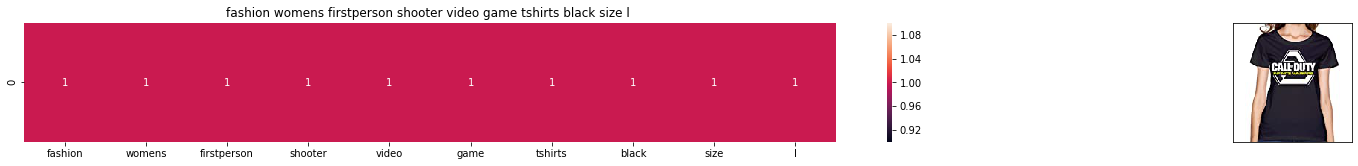

ASIN : B01INF7UVA
Brand: Aip Yep Novelty Fashion
Title: fashion womens firstperson shooter video game tshirts black size l 
Euclidean similarity with the query image : 0.0


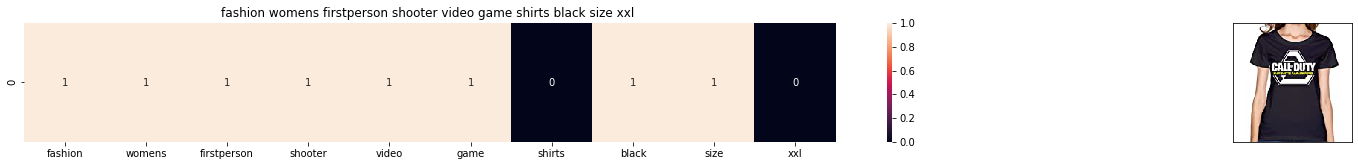

ASIN : B01INF84YM
Brand: Aip Yep Novelty Fashion
Title: fashion womens firstperson shooter video game shirts black size xxl 
Euclidean similarity with the query image : 1.7320508075688772


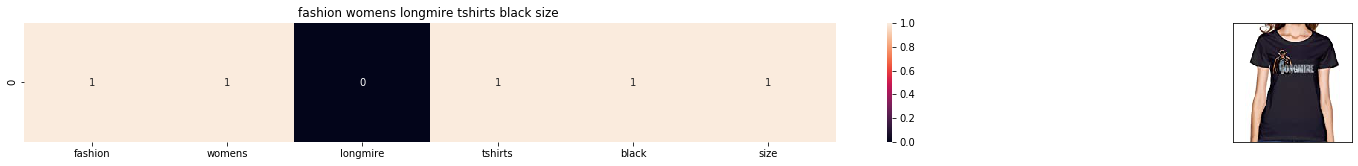

ASIN : B01IY8U5JU
Brand: Aip Yep Novelty Fashion
Title: fashion womens longmire tshirts black size 
Euclidean similarity with the query image : 2.23606797749979


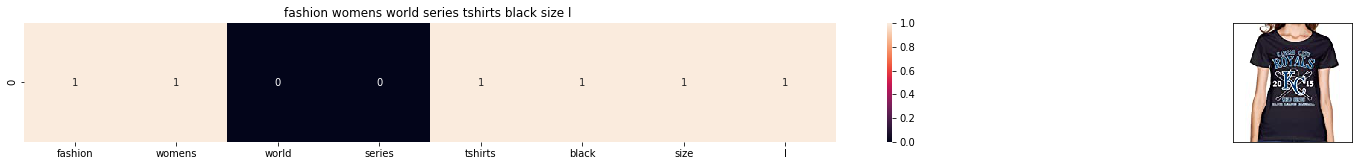

ASIN : B01J1APC5C
Brand: Aip Yep Novelty Fashion
Title: fashion womens world series tshirts black size l 
Euclidean similarity with the query image : 2.449489742783178


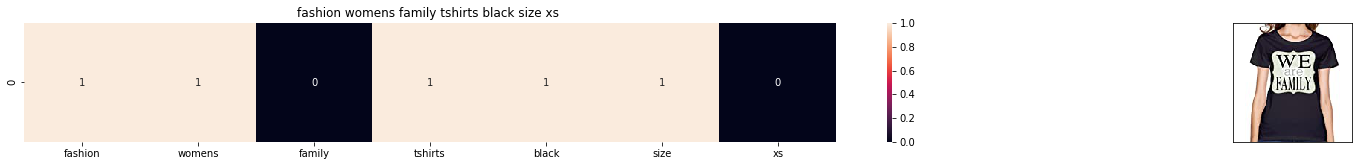

ASIN : B01IY8UHMA
Brand: Aip Yep Novelty Fashion
Title: fashion womens family tshirts black size xs 
Euclidean similarity with the query image : 2.449489742783178


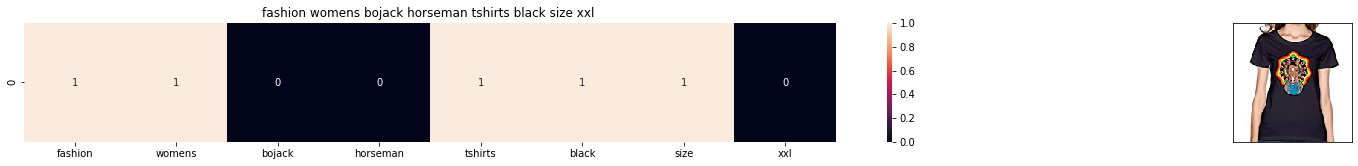

ASIN : B01JL0HMGE
Brand: Aip Yep Novelty Fashion
Title: fashion womens bojack horseman tshirts black size xxl 
Euclidean similarity with the query image : 2.6457513110645907


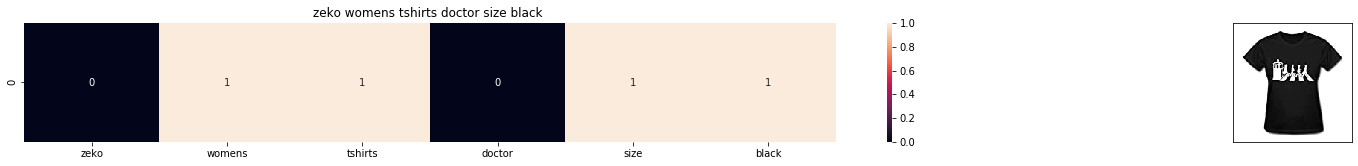

ASIN : B0154H2HN6
Brand: ZEKO
Title: zeko womens tshirts doctor size black 
Euclidean similarity with the query image : 2.6457513110645907


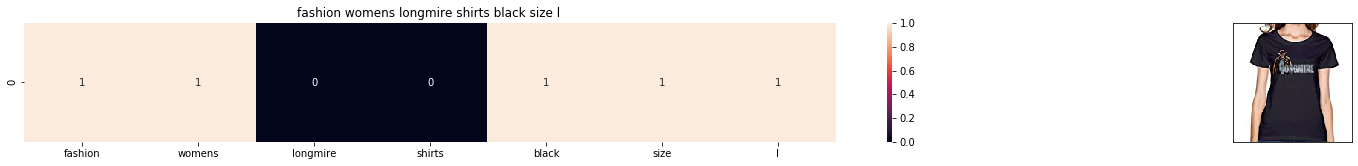

ASIN : B01IY8U6GM
Brand: Aip Yep Novelty Fashion
Title: fashion womens longmire shirts black size l 
Euclidean similarity with the query image : 2.6457513110645907


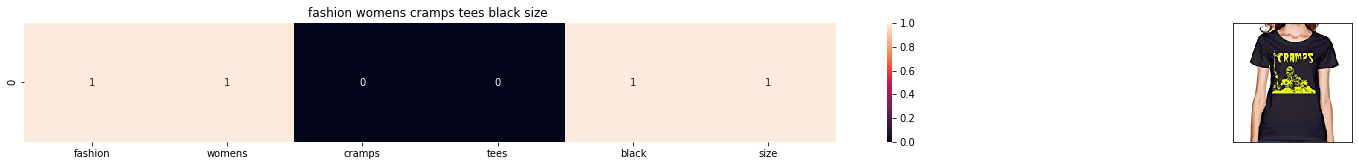

ASIN : B01IY8THYE
Brand: Aip Yep Novelty Fashion
Title: fashion womens cramps tees black size 
Euclidean similarity with the query image : 2.6457513110645907


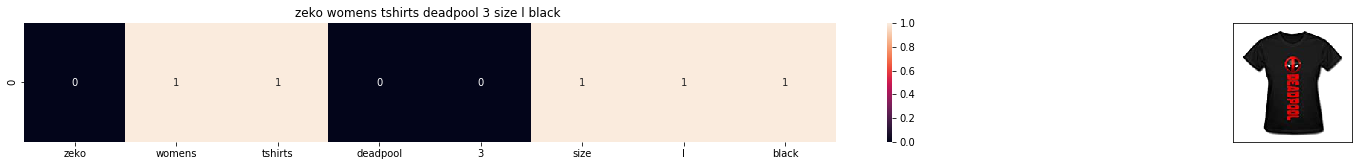

ASIN : B018QOCB2G
Brand: ZEKO
Title: zeko womens tshirts deadpool 3 size l black 
Euclidean similarity with the query image : 2.6457513110645907


In [520]:
bag_of_words_model(1000,10)

## 4.2) Using W2V ( text Semantics)

In [525]:

# credits: https://www.kaggle.com/c/word2vec-nlp-tutorial#part-2-word-vectors
# Custom Word2Vec using your own text data.
# Do NOT RUN this code.
# It is meant as a reference to build your own Word2Vec when you have 
# lots of data.

'''
# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 1    # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print ("Training model...")
model = word2vec.Word2Vec(sen_corpus, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context)
    
'''

'\n# Set values for various parameters\nnum_features = 300    # Word vector dimensionality                      \nmin_word_count = 1    # Minimum word count                        \nnum_workers = 4       # Number of threads to run in parallel\ncontext = 10          # Context window size                                                                                    \ndownsampling = 1e-3   # Downsample setting for frequent words\n\n# Initialize and train the model (this will take some time)\nfrom gensim.models import word2vec\nprint ("Training model...")\nmodel = word2vec.Word2Vec(sen_corpus, workers=num_workers,             size=num_features, min_count = min_word_count,             window = context)\n    \n'

In [526]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.

'''
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
'''

#if you do NOT have RAM >= 12GB, use the code below.
with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)


In [527]:
# Utility functions

def get_word_vec(sentence, doc_id, m_name):
    # sentence : title of the apparel
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus, we are just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # we will return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1 we caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)


def heat_map_w2v(sentence1, sentence2, url, doc_id1, doc_id2, model):
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentence2, doc_id2, model)

    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    
    
    # devide whole figure into 2 parts 1st part displays heatmap 2nd part displays image of apparel
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(sentence2.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(sentence1.split())
    # set title as recommended apparels title
    ax.set_title(sentence2)
    
    ax = plt.subplot(gs[1])
    # we remove all grids and axis labels for image
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display_img(url, ax, fig)
    
    plt.show()

In [566]:
# vocab = stores all the words that are there in google w2v model
# vocab = model.wv.vocab.keys() # if you are using Google word2Vec

vocab = model.keys()
# this function will add the vectors of each word and returns the avg vector of given sentance

# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, 10 * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

In [567]:
doc_id = 0
w2v_title = []
# for every title we build a avg vector representation
for i in data['title']:
    w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
    doc_id += 1

# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title = np.array(w2v_title)


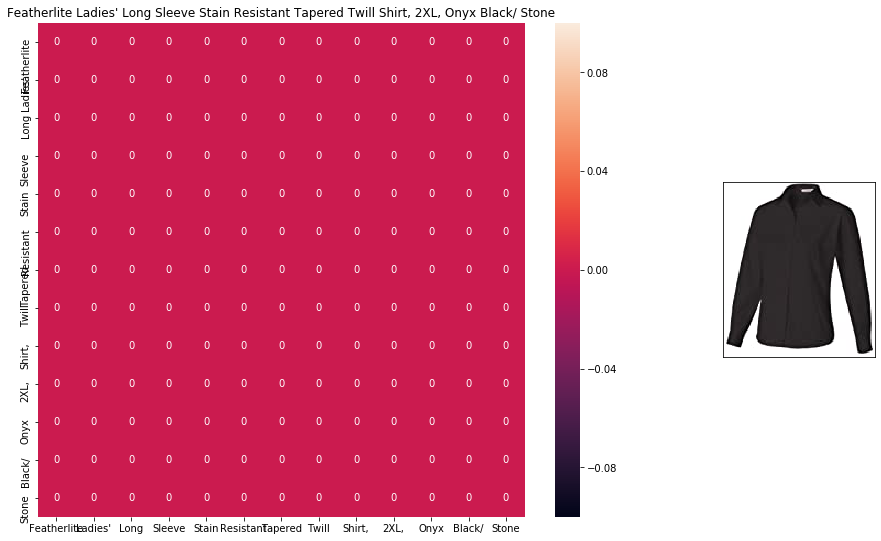

ASIN : B004GSI2OS
BRAND : FeatherLite
euclidean distance from given input image : 0.0


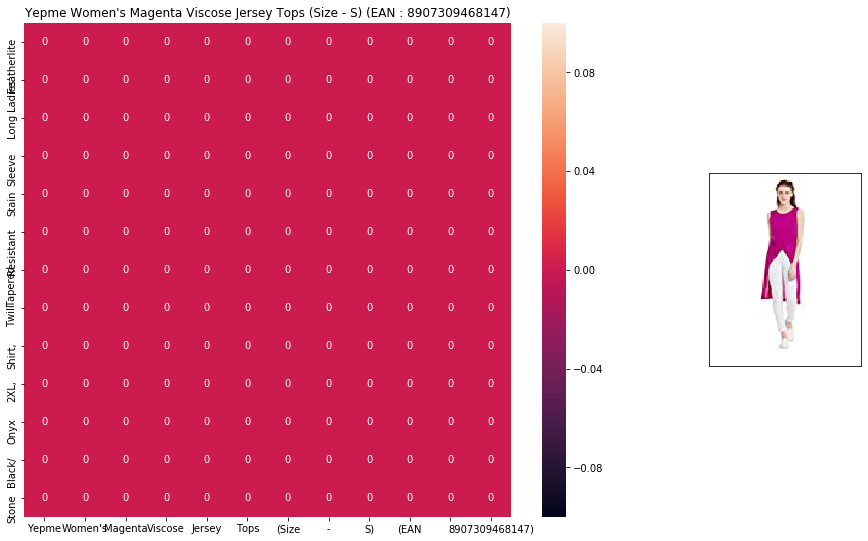

ASIN : B01N4GJOX6
BRAND : Yepme
euclidean distance from given input image : 0.0


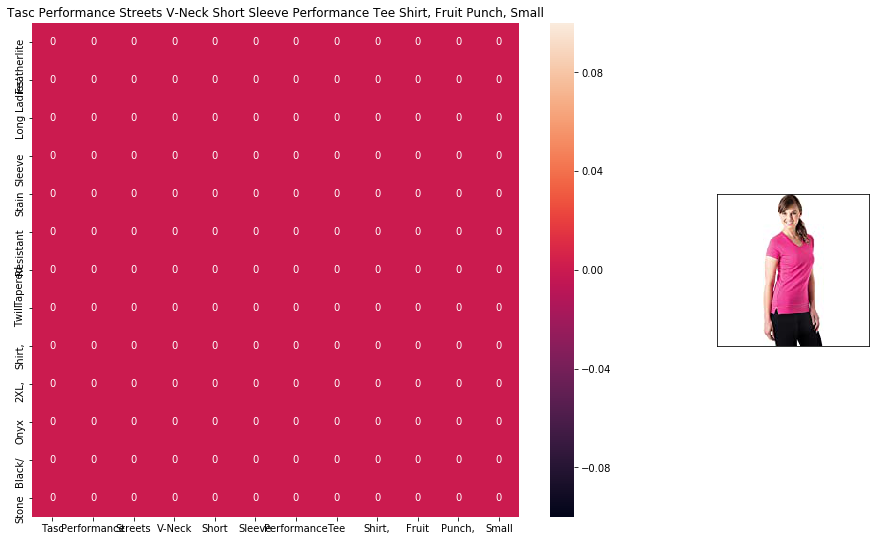

ASIN : B00J8H4QDS
BRAND : tasc Performance
euclidean distance from given input image : 0.0


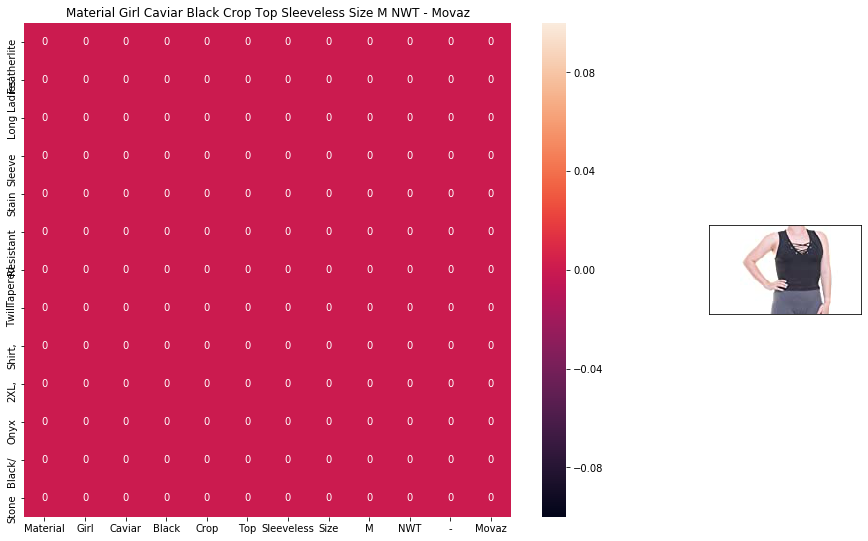

ASIN : B06XXX1L4M
BRAND : Material Girl
euclidean distance from given input image : 0.0


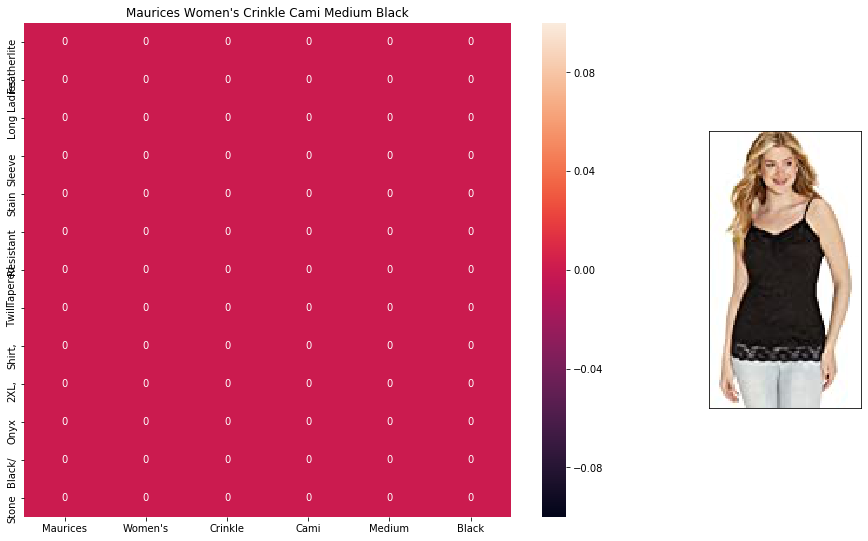

ASIN : B06XGJFG7Q
BRAND : maurices
euclidean distance from given input image : 0.0


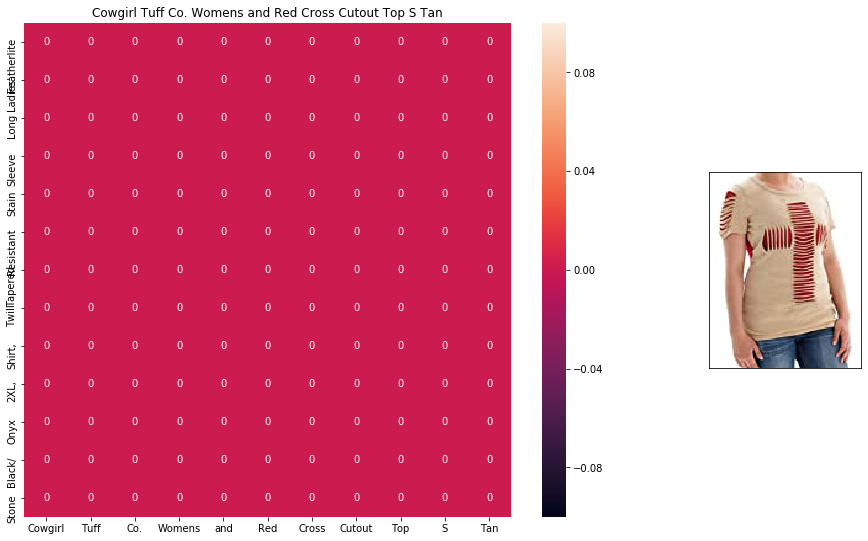

ASIN : B01K6JTRQC
BRAND : Cowgirl Tuff
euclidean distance from given input image : 0.0


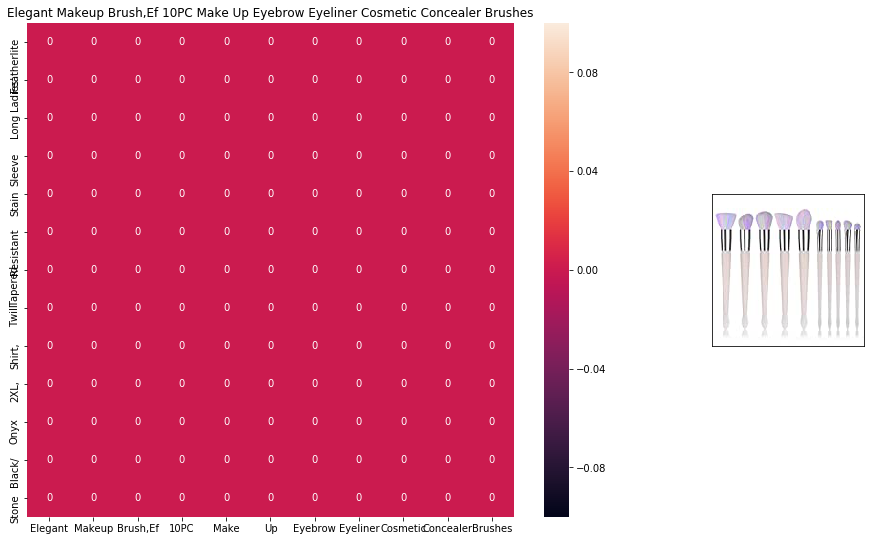

ASIN : B071CYBN2W
BRAND : Efaster(TM)
euclidean distance from given input image : 0.0


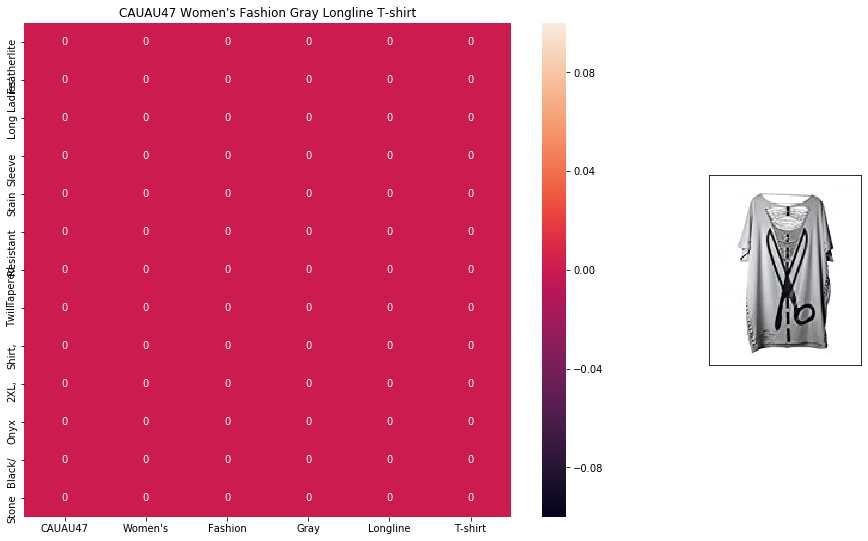

ASIN : B01G79TG3Y
BRAND : CAUAU47
euclidean distance from given input image : 0.0


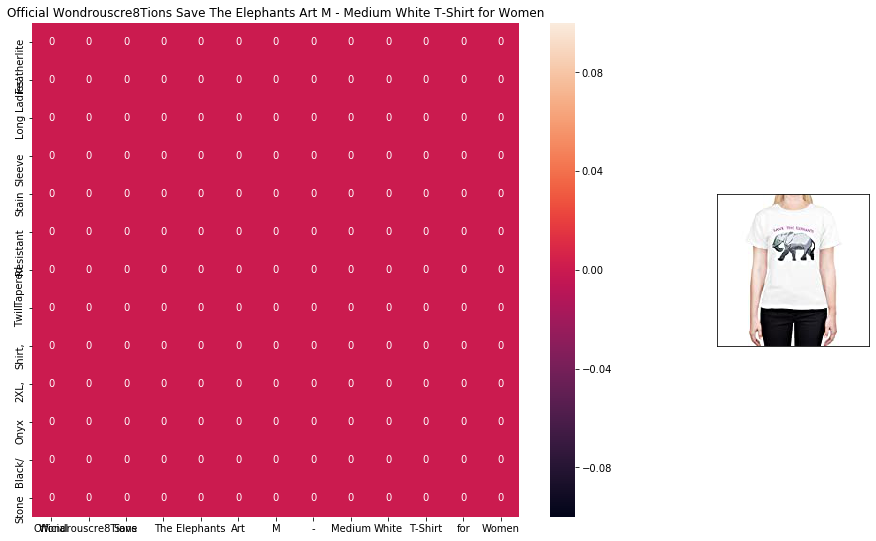

ASIN : B06XPGHBTC
BRAND : Head Case Designs
euclidean distance from given input image : 0.0


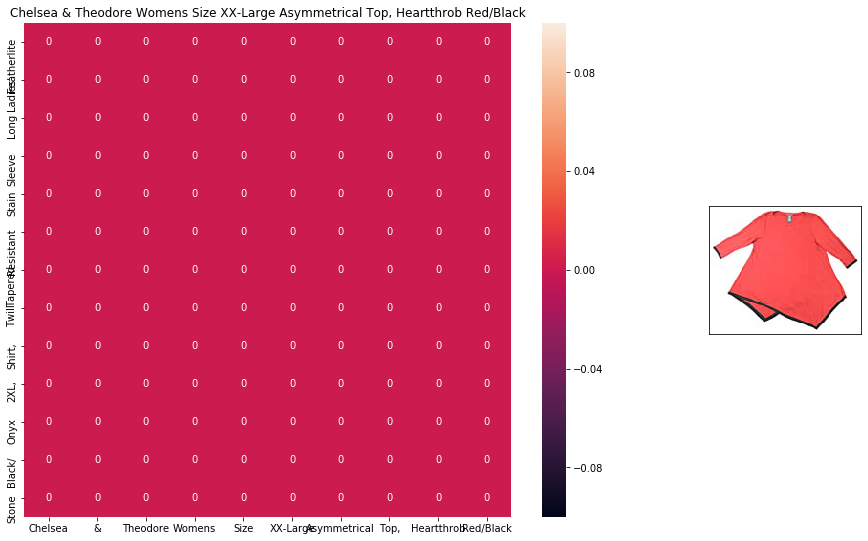

ASIN : B06ZY2RBSM
BRAND : Chelsea & Theodore
euclidean distance from given input image : 0.0


In [568]:
def avg_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))
    pairwise_dist = pairwise_distances(w2v_title, w2v_title[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from given input image :', pdists[i])
        print('='*125)

        
avg_w2v_model(1256, 10)
# in the give heat map, each cell contains the euclidean distance between words i, j

In [573]:
vocab

dict_keys(['minions', 'como', 'superheroes', 'ironman', 'long', 'sleeve', 'round', 'neck', 'tshirt', 'women', '', 'fig', 'clothing', 'womens', 'izo', 'tunic', 'top', 'focal18', 'sailor', 'collar', 'bubble', 'blouse', 'shirt', 'mori', 'girl', 'casual', 'harajuku', 'featherlite', 'ladies', 'stain', 'resistant', 'tapered', 'twill', '2xl', 'onyx', 'black', 'stone', 'fits', 'cloth', 'grape', 'solid', 'modern', 'plain', 'unique', '100', 'cotton', 'special', 'olympics', 'world', 'games', '2015', 'white', 'size', 'l', 'floerns', 'bell', 'beading', 'standing', 'promises', 'rhinestones', 'ripped', 'cut', 'red', 'fila', 'tulip', 'durable', 'tennis', 'style', 'comfort', 'tank', 'cold', 'shoulder', 'print', 'ruffle', '2x1', 'ribbed', 'fifteen', 'twenty', 'grommet', 'tie', 'yellow', 'shirtdance', 'short', 'sleeves', 'graphic', 'soft', 'fedi', 'apparel', 'vneck', 'tops', 'camouflage', 'tee', 'moisture', 'free', 'mesh', 'sport', 'xxxlarge', 'fea', 'merchandising', 'juniors', 'florida', 'georgia', 'lin

In [576]:
model['Red']

KeyError: 'Red'